In [1]:
using BarycentricInterpolation

In [2]:
using PyPlot

In [3]:
n = 100
@time p = discrete_chebyshev(n,29)
@time p = discrete_chebyshev(n,29)

  1.038818 seconds (554.93 k allocations: 27.925 MiB, 0.80% gc time)
  0.000374 seconds (6.50 k allocations: 288.406 KiB)


BarycentricInterpolation.InterpolationPolynomial{Float64}(BarycentricInterpolation.InterpolationGrid{Float64}([-100.0, -99.0, -98.0, -95.0, -91.0, -85.0, -79.0, -72.0, -65.0, -56.0  …  56.0, 65.0, 72.0, 79.0, 85.0, 91.0, 95.0, 98.0, 99.0, 100.0], [-3.13732e6, 1.28087e7, -1.4339e7, 8.68694e6, -7.30711e6, 7.71485e6, -9.44191e6, 1.09056e7, -1.0763e7, 9.95603e6  …  -9.95603e6, 1.0763e7, -1.09056e7, 9.44191e6, -7.71485e6, 7.30711e6, -8.68694e6, 1.4339e7, -1.28087e7, 3.13732e6], 100.0), [-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0  …  -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0])

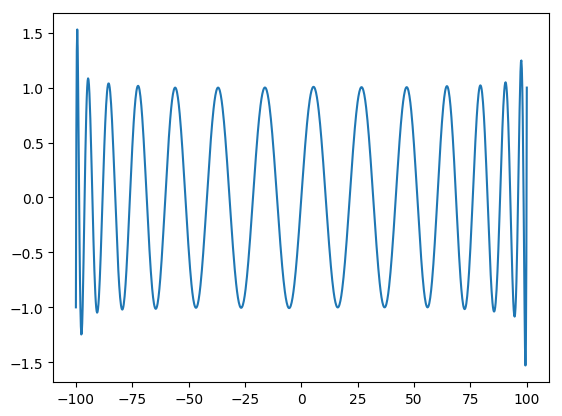

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcebc3e6d90>

In [4]:
xx = linspace(-n,n,1000)
yy= [p(x) for x in xx]
plot(xx, yy)

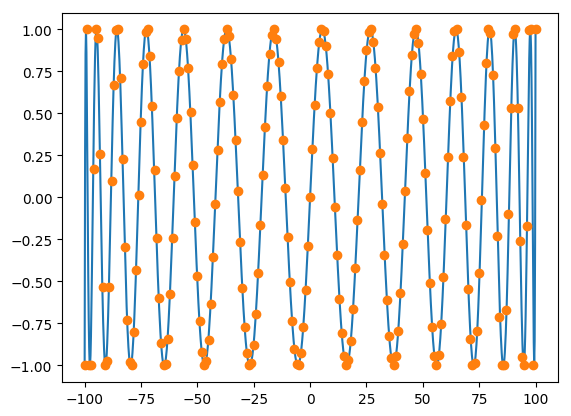

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcebc0f2450>

In [5]:
p1 = chebyshev(29,(-n,n))
xx = linspace(-n,n,1000)
yy= [p1(x) for x in xx]
plot(xx,yy)
xx = -n:n+0.0
yy= [p(x) for x in xx]
plot(xx,yy, "o")

In [6]:
@time r=roots(p)
@time r=roots(p)

  3.010237 seconds (1.23 M allocations: 63.106 MiB, 0.86% gc time)
  0.000917 seconds (286 allocations: 110.719 KiB)


29-element Array{Float64,1}:
 -99.8883
 -98.5717
 -96.1388
 -92.6905
 -88.1549
 -82.5641
 -76.0322
 -68.5992
 -60.3481
 -51.4353
 -41.885 
 -31.8649
 -21.4461
   ⋮     
  31.8649
  41.885 
  51.4353
  60.3481
  68.5992
  76.0322
  82.5641
  88.1549
  92.6905
  96.1388
  98.5717
  99.8883

In [7]:
p.(r)

29-element Array{Float64,1}:
 -1.04676e-12
  2.16758e-13
 -8.93725e-14
 -1.3496e-14 
 -4.99427e-14
  1.44101e-14
 -1.95304e-14
  2.66328e-14
 -2.74616e-14
  0.0        
 -1.61635e-15
  2.22965e-15
  4.48883e-15
  ⋮          
 -3.53668e-15
  3.63293e-14
 -2.52216e-15
  5.30524e-14
 -4.95132e-14
  4.59421e-14
 -7.51314e-14
  5.88428e-14
 -5.75588e-14
  1.5833e-13 
 -5.08099e-13
  1.26104e-12

In [8]:
function dcp_vandermonde_matrix(n::Int)
    V=zeros(2*n+1,2*n+1)
    xx = -n:n+0.0
    for d=0:2*n
        p = discrete_chebyshev(n, d)
        V[d+1,:] = [p(x) for x in xx]
    end
    V
end
        

dcp_vandermonde_matrix (generic function with 1 method)

In [9]:
@time V = dcp_vandermonde_matrix(100)
@time V = dcp_vandermonde_matrix(100)

  1.402699 seconds (18.53 M allocations: 822.682 MiB, 9.10% gc time)
  1.327302 seconds (18.49 M allocations: 820.834 MiB, 10.43% gc time)


201×201 Array{Float64,2}:
  1.0   1.0         1.0         1.0        …   1.0         1.0        1.0
 -1.0  -0.99       -0.98       -0.97           0.98        0.99       1.0
  1.0   0.9602      0.9208      0.8818         0.9208      0.9602     1.0
 -1.0  -0.911196   -0.824768   -0.740692       0.824768    0.911196   1.0
  1.0   0.843958    0.695725    0.555113       0.695725    0.843958   1.0
 -1.0  -0.759856   -0.538884   -0.336272   …   0.538884    0.759856   1.0
  1.0   0.66038     0.36015     0.0967743      0.36015     0.66038    1.0
 -1.0  -0.547983   -0.167554    0.147756       0.167554    0.547983   1.0
  1.0   0.423718   -0.0334106  -0.385714      -0.0334106   0.423718   1.0
 -1.0  -0.292454    0.230351    0.596859      -0.230351    0.292454   1.0
  1.0   0.154536   -0.419596   -0.774336   …  -0.419596    0.154536   1.0
 -1.0  -0.0135744   0.591853    0.904925      -0.591853    0.0135744  1.0
  1.0  -0.137435   -0.756184   -1.0           -0.756184   -0.137435   1.0
  ⋮         

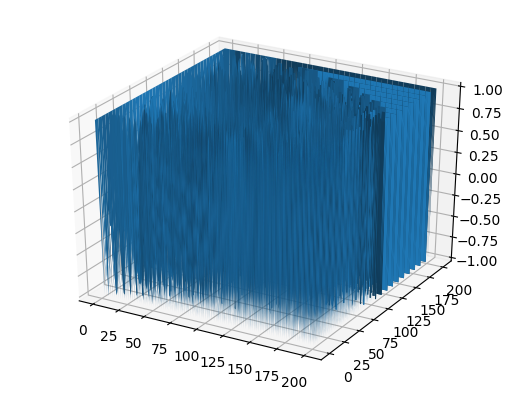

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7fcebc0063d0>

In [10]:
surf(V)

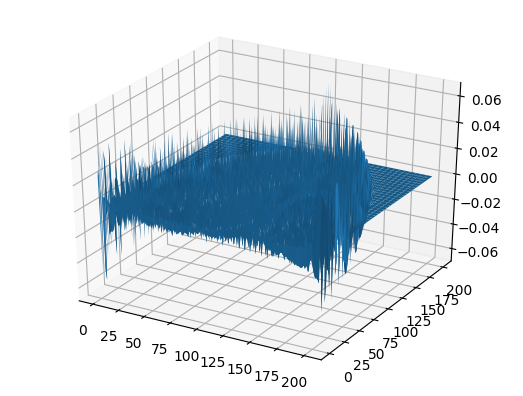

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7fceb7ac50d0>

In [11]:
surf(inv(V))